# Multiple Linear Regression - Math, Intuition & Implementation from Scratch in Python
This notebook follows a [youtube video](https://www.youtube.com/watch?v=fldD6fGmsQE) walkthrough. The below sections cover the python implementation of both Linear Regression and Multiple Linear Regression from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Linear Regression

## Initialize some X, y, w, b
First we will initialize a sample dataset given X input features and y output labels.

In [2]:
X = np.array([1,3,4])
y = np.array([2,4,8])
X.shape, y.shape

((3,), (3,))

Next, initialize a random weight and bias value to make predictions using an untrained Linear Regression model.

In [3]:
w = 1.5
b = 1

## Predict y_hat
Now test our model parameters by inputting X into a `predict_y` function.

In [4]:
def predict_y(X, w, b):
    m = X.shape[0]
    y_hat = np.zeros(m)

    for i in range(m):
        y_hat[i] = w * X[i] + b
    return y_hat

In [5]:
predict_y(X, w, b), y

(array([2.5, 5.5, 7. ]), array([2, 4, 8]))

Plot the true y values against the predicted y values.

In [6]:
def plot_true_vs_preds(X, y, w, b):
    y_hat = predict_y(X, w, b)
    plt.figure(figsize=(4,3))
    plt.scatter(X, y, label='y_true')
    plt.plot(X, y_hat, label='y_hat')
    plt.title('y_true vs y_hat')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

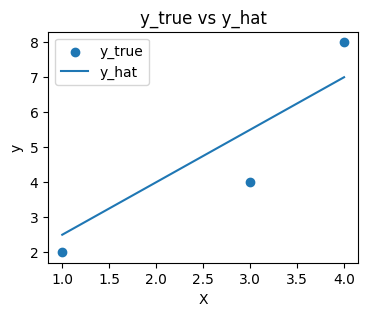

In [7]:
plot_true_vs_preds(X, y, w, b)

## MSE Cost Function
Linear Regression uses the Mean Squared Error (MSE) cost function. It divides the sum by `2m` rather than just `2` to clean up the partial derivates later on.

In [8]:
def calc_mse(X, y, w, b):
    m = X.shape[0]
    y_hat = predict_y(X, w, b)
    SE_sum = np.sum((y_hat - y)**2)
    MSE = SE_sum / (2. * m)
    return MSE

In [9]:
calc_mse(X, y, w, b)

0.5833333333333334

## Gradient Descent
For a single gradient step, first calculate the gradient (AKA, the partial derivatives for the weight and bias).

In [10]:
def calc_gradient(X, y, w, b):
    m = X.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        err = w * X[i] + b - y[i]
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

Apply a single gradient step with an alpha (learning rate).

In [11]:
alpha = 0.01

dj_dw, dj_db = calc_gradient(X, y, w, b)

w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

print(f"Cost Before: {calc_mse(X, y, w, b)}")
print(f"Cost After: {calc_mse(X, y, w_new, b_new)}")

Cost Before: 0.5833333333333334
Cost After: 0.5811944444444447


Perform gradient descent. Apply the gradient step to the weight and bias over 1000 iterations.

In [12]:
def gradient_descent(X, y, w, b, n_iters=1000, alpha=0.01, history_interval=100):
    m = X.shape[0]

    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if iter % history_interval == 0:
            cost = calc_mse(X, y, w, b)
            history[iter] = cost
            print(f"Iter\t{iter}\tCost\t{cost}")

    return history, w, b

In [13]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	0.5811944444444447
Iter	100	Cost	0.5331333459418242
Iter	200	Cost	0.5039202524118163
Iter	300	Cost	0.4828688764164708
Iter	400	Cost	0.4676989516331069
Iter	500	Cost	0.45676728531429633
Iter	600	Cost	0.4488897690963613
Iter	700	Cost	0.4432131174355751
Iter	800	Cost	0.4391224404777116
Iter	900	Cost	0.43617463973644127


Plot the cost of our weight and bias over the training history.

In [14]:
def plot_history(history):
    plt.figure(figsize=(4,3))
    plt.plot(history.keys(), history.values())
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

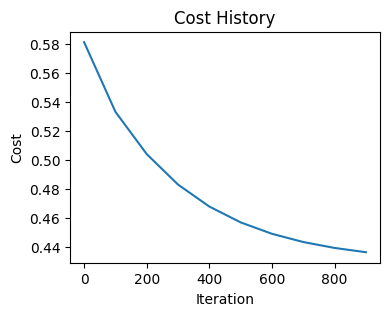

In [15]:
plot_history(history)

## Model Evaluation
Evaluate how well our model predicts `y` with the trained model.

Text(0.5, 1.0, 'Old vs New Predictions')

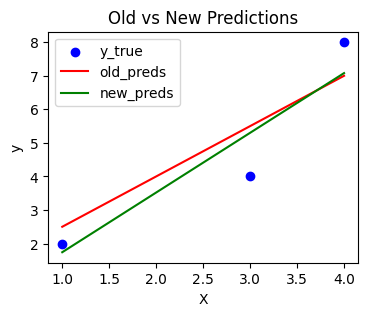

In [16]:
y_hat_old = predict_y(X, w, b)
y_hat_new = predict_y(X, w_new, b_new)

plt.figure(figsize=(4,3))
plt.scatter(X, y, label='y_true', color='b')
plt.plot(X, y_hat_old, label='old_preds', color='r')
plt.plot(X, y_hat_new, label='new_preds', color='g')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Old vs New Predictions')

## Fitting More Data with Linear Regression
Create a new dataset with several training examples and fit a model to it.

In [17]:
m = 20
target_w = 3.3
target_b = -1.2
X = np.random.uniform(-5,5,m)
noise = np.random.uniform(-3,3,m)
y = X * target_w + target_b + noise

Text(0, 0.5, 'y')

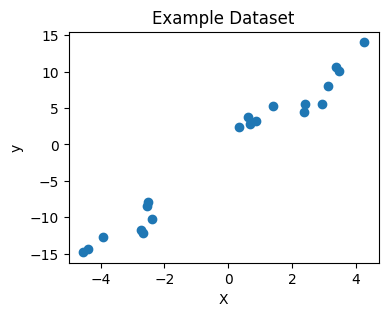

In [18]:
plt.figure(figsize=(4,3))
plt.title('Example Dataset')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [19]:
w_init = 0
b_init = 0
history, w, b = gradient_descent(X, y, w_init, b_init)

Iter	0	Cost	36.95473156433895
Iter	100	Cost	1.4283289743000385
Iter	200	Cost	1.3863805988635156
Iter	300	Cost	1.380760442258554
Iter	400	Cost	1.380007440655299
Iter	500	Cost	1.3799065517558673
Iter	600	Cost	1.3798930344273717
Iter	700	Cost	1.3798912233443819
Iter	800	Cost	1.3798909806912865
Iter	900	Cost	1.379890948180063


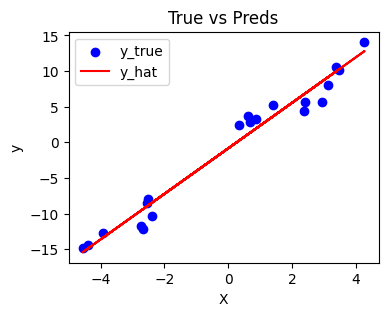

In [20]:
plt.figure(figsize=(4,3))
plt.scatter(X, y, label='y_true', color='b')
plt.plot(X, predict_y(X, w, b), label='y_hat', color='r')
plt.title("True vs Preds")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [21]:
w, b

(3.1971979392655636, -0.8551398983357845)

# Multiple Linear Regression
With Linear Regression done and working, this section will cover Multiple Linear Regression.

## Initialize X, y, w, b
Like before, initialize our dataset and model parameters.

In [22]:
X = np.array([
    [1,2],
    [2,1],
    [3,1],
    [1,3]
])

y = np.array([3,6,8,7])
X.shape, y.shape

((4, 2), (4,))

In [23]:
w = np.array([3,2])
b = -2

## Predict y_hat
Created an updated prediction function using multiple features and the dot product.

In [24]:
def predict_y(X, w, b):
    m = X.shape[0]

    y_hat = np.zeros(m)

    for i in range(m):
        y_hat[i] = np.dot(w, X[i]) + b
    return y_hat

In [25]:
y_hat = predict_y(X, w, b)
y_hat, y

(array([5., 6., 9., 7.]), array([3, 6, 8, 7]))

In [26]:
def plot_true_vs_preds(X, y, w, b):
    y_hat = predict_y(X, w, b)
    Xpts = np.arange(0, X.shape[0])
    plt.figure(figsize=(4,3))
    plt.scatter(Xpts, y_hat, marker='o', color='g', label='y_hat')
    plt.scatter(Xpts, y, marker='x', color='b', label='y_true')
    plt.title('y_hat vs y_true')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

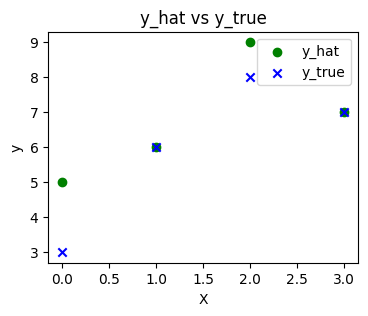

In [27]:
plot_true_vs_preds(X, y, w, b)

## MSE Cost Function
Apply the new cost function that uses the updated `predict_y` function.

In [28]:
def calc_mse(X, y, w, b):
    m = X.shape[0]

    y_hat = predict_y(X, w, b)
    sum = np.sum((y_hat-y)**2)
    res = sum / (2. * m)
    return res

In [29]:
calc_mse(X, y, w, b)

0.625

## Gradient Descent
Calculate the gradient of the cost function given multiple features.
> Note: The function below was previously `gradient_step` in the video but is now rewritted as `calculate_gradient`

In [30]:
def calculate_gradient(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        err = np.dot(w, X[i]) + b - y[i]
        # for j in range(n):
        #     dj_dw[j] += err * X[i, j]
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [31]:
alpha = 0.01

dj_dw, dj_db = calculate_gradient(X, y, w, b)
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

print(f"Cost Before: {calc_mse(X, y, w, b)}")
print(f"Cost After: {calc_mse(X, y, w_new, b_new)}")

Cost Before: 0.625
Cost After: 0.5894578125


Write a function for the gradient descent algorithm over multiple generations.

In [32]:
def gradient_descent(X, y, w, b, n_iters=1000, alpha=0.01, history_interval=100):
    m = X.shape[0]

    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calculate_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % history_interval == 0:
            cost = calc_mse(X, y, w, b)
            history[iter] = cost
            print(f"Iteration\t{iter}\tCost\t{cost}")

    return history, w, b

In [33]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iteration	0	Cost	0.5894578125
Iteration	100	Cost	0.36823951957889617
Iteration	200	Cost	0.36634556681700137
Iteration	300	Cost	0.36451602962844637
Iteration	400	Cost	0.36274865552077584
Iteration	500	Cost	0.3610413323485339
Iteration	600	Cost	0.3593920197316842
Iteration	700	Cost	0.3577987466171816
Iteration	800	Cost	0.3562596089234168
Iteration	900	Cost	0.3547727672646914


Observe the training history and results.

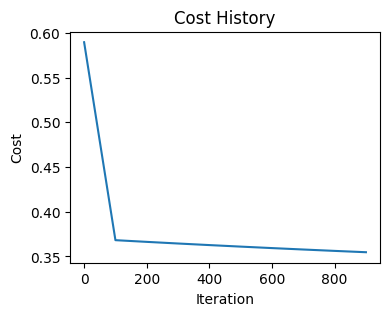

In [34]:
plot_history(history)

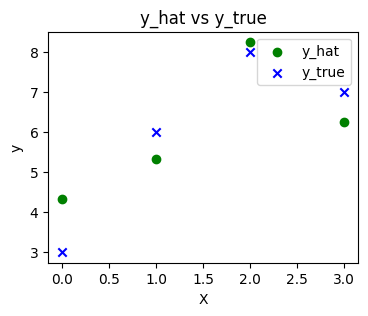

In [35]:
plot_true_vs_preds(X, y, w_new, b_new)

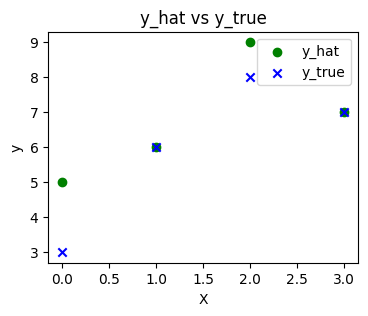

In [36]:
plot_true_vs_preds(X, y, w, b)

## Using Diabetes Dataset
Apply the Diabetes dataset from Scikit-learn to Multiple Linear Regression

In [37]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [38]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [39]:
min(y), max(y), y.std()

(25.0, 346.0, 77.00574586945044)

In [40]:
w = np.zeros(X.shape[1])
b = 0
history, w, b = gradient_descent(X, y, w, b, alpha=0.1)

Iteration	0	Cost	12336.547765870786
Iteration	100	Cost	2782.489758994427
Iteration	200	Cost	2628.7104617566306
Iteration	300	Cost	2497.3595449594336
Iteration	400	Cost	2384.854549915675
Iteration	500	Cost	2288.2019653256484
Iteration	600	Cost	2204.8995412321424
Iteration	700	Cost	2132.854855265299
Iteration	800	Cost	2070.3174202143937
Iteration	900	Cost	2015.8220788947174


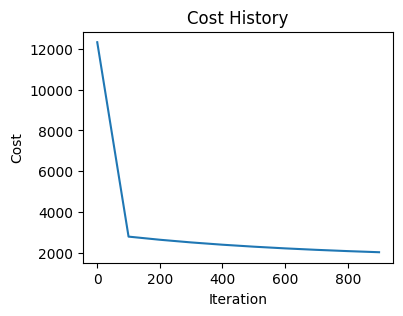

In [41]:
plot_history(history)

In [42]:
y_hat = predict_y(X, w, b)
y_hat[:10], y[:10]

(array([168.82351966, 109.95887833, 160.22688525, 153.29356094,
        139.65648937, 108.38326215, 121.38550649, 162.48897233,
        159.86792305, 161.77385555]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.]))

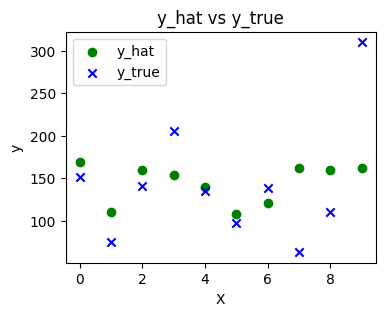

In [43]:
plot_true_vs_preds(X[:10], y[:10], w, b)